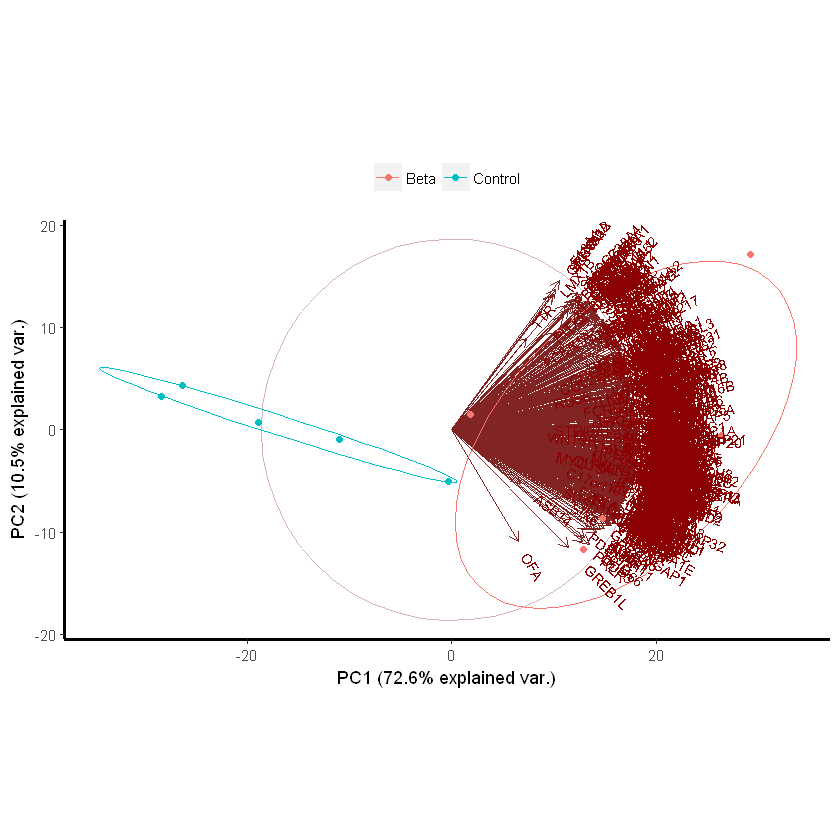

In [2]:
setwd("E:\\PVN_Sequencing\\PCA_GeneExp_Behav")
data2<- read.csv ("PVNsigUP_HPA1.csv", header=TRUE, row.name=1)	

n=ncol(data2)

data_2<-data2 [,1:(n-1)]
Group2<- data2[,n]

pca2<-prcomp(data_2,
                center = TRUE,
                 scale. = TRUE)

library(ggbiplot)
library(plotly)
g <- ggbiplot(pca2, obs.scale = 1, var.scale = 1, 
              groups = Group2, ellipse = TRUE,varname.size = 3, varname.adjust = 2, 
              circle = TRUE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', 
               legend.position = 'top',
               panel.background= element_rect(fill = 'white'),
               axis.line = element_line(colour = "black", size = 1))
g 

In [20]:
input <- data_2[,c("GREB1L","PRLR","TRIM66","OFA")]

  
model <- lm(OFA~GREB1L+PRLR+TRIM66, data = input)
summary(model)

input['Predicted'] = fitted.values(model)

input 



Call:
lm(formula = OFA ~ GREB1L + PRLR + TRIM66, data = input)

Residuals:
    Min      1Q  Median      3Q     Max 
-686.07 -203.12   35.41  190.11  719.69 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -2589.357   1062.254  -2.438   0.0506 .
GREB1L         10.613      4.102   2.587   0.0414 *
PRLR          -38.916     23.994  -1.622   0.1560  
TRIM66          1.348      2.765   0.488   0.6431  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 521.1 on 6 degrees of freedom
Multiple R-squared:  0.804,	Adjusted R-squared:  0.706 
F-statistic: 8.203 on 3 and 6 DF,  p-value: 0.01521


,GREB1L,PRLR,TRIM66,OFA,Predicted
Control1,387,29,614,1344.6,1217.2695
Control2,465,73,845,1091.0,644.2328
Control3,363,37,605,780.0,639.0819
Control4,274,23,617,462.0,255.4928
Control5,325,35,464,67.0,123.5069
Beta1,458,58,798,956.0,1090.3188
Beta2,414,61,785,263.0,489.0513
Beta3,736,103,1133,2203.0,2741.2686
Beta4,686,96,996,3018.0,2298.3069
Beta5,421,53,677,43.0,729.0705


In [74]:
### Leave One Out Cross Validation (LOO CV)

Predicted_CV = NULL

for (i in (1:nrow(input))){
    loo <-input[-i,]
    model_cv = lm(OFA~GREB1L+PRLR+TRIM66, data=loo)
    a <- coef(model_cv)[1]
    XGREB1L <- coef(model_cv)[2]
    XPRLR <- coef(model_cv)[3]
    XTRIM66<-coef(model_cv)[4]
    row = input[i,] 
    Predicted_CV[i]= a+XGREB1L*row['GREB1L']+XPRLR*row['PRLR']+XTRIM66*row['TRIM66']
    
}


Predicted_CV= as.numeric(Predicted_CV)

In [75]:
final = cbind(input,Predicted_CV)
final

,GREB1L,PRLR,TRIM66,OFA,Predicted,Predicted_CV
Control1,387,29,614,1344.6,1217.2695,1062.861504
Control2,465,73,845,1091.0,644.2328,313.761255
Control3,363,37,605,780.0,639.0819,609.199441
Control4,274,23,617,462.0,255.4928,1.363527
Control5,325,35,464,67.0,123.5069,234.785269
Beta1,458,58,798,956.0,1090.3188,1111.912306
Beta2,414,61,785,263.0,489.0513,602.695488
Beta3,736,103,1133,2203.0,2741.2686,3436.798599
Beta4,686,96,996,3018.0,2298.3069,1742.619956
Beta5,421,53,677,43.0,729.0705,864.065442


In [64]:
## Model using fitted values before cross validation
model_predicted = lm(Predicted ~ OFA, data=final)
summary(model_predicted)


Call:
lm(formula = Predicted ~ OFA, data = final)

Residuals:
    Min      1Q  Median      3Q     Max 
-433.39 -284.45  -97.54  110.21  769.62 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 200.4786   192.2958   1.043  0.32763    
OFA           0.8040     0.1404   5.728  0.00044 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 404.6 on 8 degrees of freedom
Multiple R-squared:  0.804,	Adjusted R-squared:  0.7795 
F-statistic: 32.81 on 1 and 8 DF,  p-value: 0.0004398


In [83]:
library(devtools)
library(ggplot2)

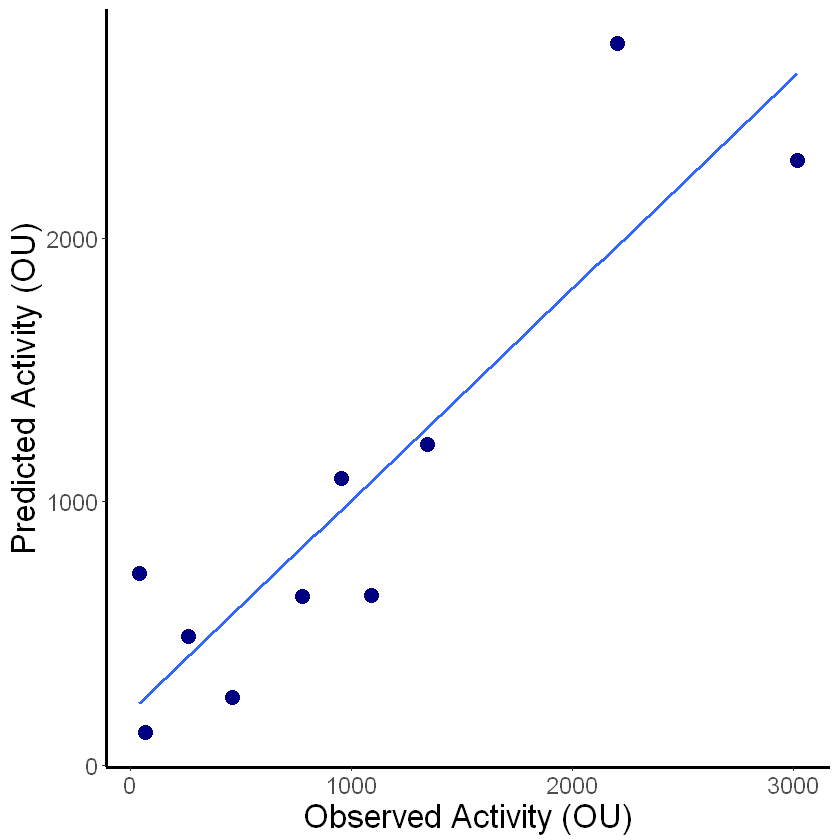

In [86]:
## Model Without Cross Validation

p<- ggplot(input,aes(OFA,Predicted)) +
    geom_point(size=4, color = 'navy') +
    labs(
        x= "Observed Activity (OU)",
        y= "Predicted Activity (OU)"
        ) +
    geom_smooth(method = 'lm', se=FALSE)
p + theme(
        axis.line = element_line(colour = "black", size = 1),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size=20),
        axis.text = element_text(size=14),
        panel.background= element_rect(fill = 'white'))

In [76]:
## Model using fitted values After LOO CV
model_predicted = lm(Predicted_CV ~ OFA, data=final)
summary(model_predicted)


Call:
lm(formula = Predicted_CV ~ OFA, data = final)

Residuals:
   Min     1Q Median     3Q    Max 
-734.7 -488.8 -114.8  165.7 1566.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 241.7774   350.2551   0.690   0.5095  
OFA           0.7394     0.2556   2.892   0.0201 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 737 on 8 degrees of freedom
Multiple R-squared:  0.5112,	Adjusted R-squared:  0.4501 
F-statistic: 8.365 on 1 and 8 DF,  p-value: 0.02013


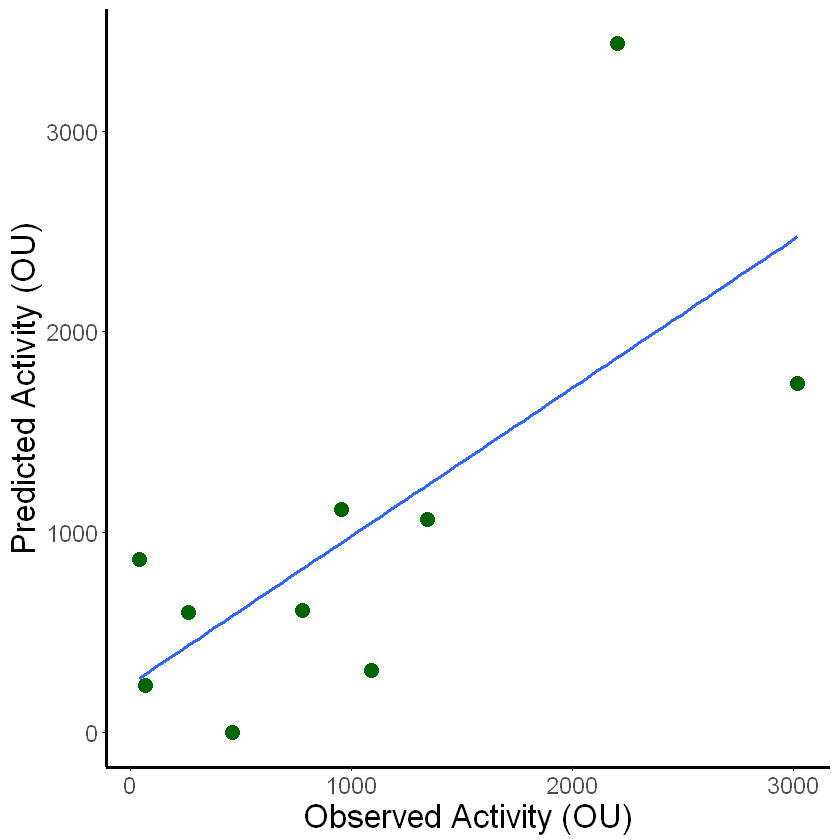

In [88]:
## Model with LOO Cross Validation
p<- ggplot(input,aes(OFA,Predicted_CV)) +
    geom_point(size=4, color = 'darkgreen') +
    labs(
        x= "Observed Activity (OU)",
        y= "Predicted Activity (OU)"
        ) +
    geom_smooth(method = 'lm', se=FALSE)
p + theme(
        axis.line = element_line(colour = "black", size = 1),
        axis.title.x = element_text(size=20),
        axis.title.y = element_text(size=20),
        axis.text = element_text(size=14),
        panel.background= element_rect(fill = 'white'))